# Isobraic binary phase diagrams

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams. As long as the TDB file is present, each cell in these examples is self contained and can completely reproduce the figure shown.

Units are Kelvin

## Importing modules

In [466]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
from pycalphad import Database, equilibrium, variables as v
import numpy as np

### Defining file paths for program and database

In [467]:
# Set the file path
# dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\Mod Sc-Zr\\'

### Load database

In [468]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database good for Zr
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad.tdb') #Aluminum database addition of Sc (GOOD)
# dbf = Database(dbf_diretory + 'mc_al_v2.035.tdb') #Matcalc 2021 Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2037.tdb') #Matcalc 2025 version
dbf = Database(dbf_diretory + 'MOD_mc_al_v2.032_ZR_COST507_GOOD.tdb') #Describes basic Al3Zr
# dbf = Database(dbf_diretory + 'MOD_mc_al_v2.032_ZR_COST507_D023AL3ZR.tdb') #Describes more complex Al3Zr with phase type D023
                                                                             # and 75% Al and 25% of either Zr, Sc, or Cu  

# dbf = Database(dbf_diretory + 'MODdev_mc_al_v2.032_ZR_COST507_GOOD.tdb') #Aluminum database Not reliable for Sc and Zr

### Determine phases

In [469]:
# phases = list(dbf.phases.keys())
# -- Al-Sc --
# phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC', 'SC2AL'] # Scandium

# -- Al-Zr --
# phases = ['LIQUID', 'FCC_A1','HCP_A3','BCC_A2',
#           'ALZR','ALZR2','ALZR3','AL2ZR','AL2ZR3','AL3ZR','AL3ZR2','AL3ZR4','AL3ZR5','AL4ZR5',]

# -- Al-Zr-Sc --
phases = ['LIQUID', 'FCC_A1','HCP_A3','BCC_A2',
          'ALZR','ALZR2','ALZR3','AL2ZR','AL2ZR3','AL3ZR','AL3ZR2','AL3ZR4','AL3ZR5','AL4ZR5',
          'AL3SC', 'AL2SC', 'ALSC', 'SC2AL']
phases

['LIQUID',
 'FCC_A1',
 'HCP_A3',
 'BCC_A2',
 'ALZR',
 'ALZR2',
 'ALZR3',
 'AL2ZR',
 'AL2ZR3',
 'AL3ZR',
 'AL3ZR2',
 'AL3ZR4',
 'AL3ZR5',
 'AL4ZR5',
 'AL3SC',
 'AL2SC',
 'ALSC',
 'SC2AL']

## Set conditions

In [470]:
# composition_range = {v.X('ZR'):(0,0.006,0.2)}
composition_range = {v.X('ZR'):(0,1,0.2)}

# composition_range = {v.X('SC'):(0,1,0.2)}

temperature_range = {v.T: (473.15, 2273.15, 10)}
# temperature_range = {v.T: (473.15, 1800.15, 10)}

pressure = {v.P:101325}
moles = {v.N: 1}

# Combine all conditions into a single dictionary
conditions = {**composition_range, **temperature_range, **pressure, **moles}


C:\Users\jose.muniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pycalphad\codegen\sympydiff_utils.py:59: SyntaxWarning: invalid escape sequence '\m'
  """Build function, gradient, and Hessian callables of the symengine_graph.

KeyboardInterrupt



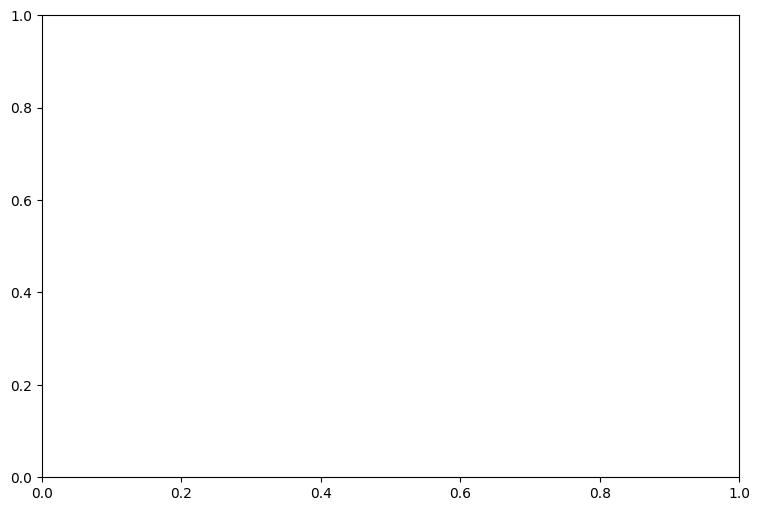

In [471]:
# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(dbf, ['AL', 'ZR', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})
# binplot(dbf, ['AL', 'SC', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})

# Set axis limits AFTER plotting
axes.set_xlim(0, 1)  # Composition range
# axes.set_xlim(0, 0.006)  # Composition range in mol fraction
# axes.set_xlim(0, 0.004)  # Composition range in mol fraction for Zr
# axes.set_xlim(0, 0.006)  # Composition range in mol fraction

axes.set_ylim(600.15, 2273.15)  # Temperature range in Kelvin
# axes.set_ylim(600.15, 1800.15)  # Temperature range in Kelvin

# Update axis labels
axes.set_ylabel('Temperature (K)')
# axes.set_xlabel('Mole Fraction of Ti')

plt.show()

In [ ]:
# Molar masses (g/mol)
M_Al = 26.9815
M_Zr = 91.224

def molefrac_to_wtpercent(x):
    return (x * M_Zr) / (x * M_Zr + (1 - x) * M_Al) * 100

# Create the plot
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(dbf, ['AL', 'ZR', 'VA'], phases, conditions, plot_kwargs={'ax': axes})

# Set limits
axes.set_xlim(0, 0.0042)
# axes.set_ylim(600.15, 1400.15)
axes.set_ylim(600.15, 2273.15)  # Temperature range in Kelvin

axes.set_ylabel('Temperature (K)')

# Choose refined tick positions in mole fraction
ticks_mf = np.linspace(0, 0.0042, 9)  # 0.0 → 0.004, 9 ticks
# ticks_mf = np.linspace(0, 0.006, 9)  # 0.0 → 0.004, 9 ticks

ticks_wt = molefrac_to_wtpercent(ticks_mf)

# Apply ticks & labels
axes.set_xticks(ticks_mf)
axes.set_xticklabels([f"{wt:.1f}" for wt in ticks_wt])  # two decimals for refinement
axes.set_xlabel('Zr weight percent (wt%)')

# Add grid
axes.grid(True, which='major', linestyle='-', linewidth=0.7, alpha=0.7)
axes.grid(True, which='minor', linestyle='--', linewidth=0.5, alpha=0.5)
axes.minorticks_on()

plt.show()


### Al-Sc

In [472]:
phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC', 'SC2AL'] # Scandium

# composition_range = {v.X('ZR'):(0,0.006,0.2)}
# composition_range = {v.X('ZR'):(0,1,0.2)}

composition_range = {v.X('SC'):(0,1,0.2)}

temperature_range = {v.T: (473.15, 2273.15, 10)}
# temperature_range = {v.T: (473.15, 1800.15, 10)}

pressure = {v.P:101325}
moles = {v.N: 1}

# Combine all conditions into a single dictionary
conditions = {**composition_range, **temperature_range, **pressure, **moles}


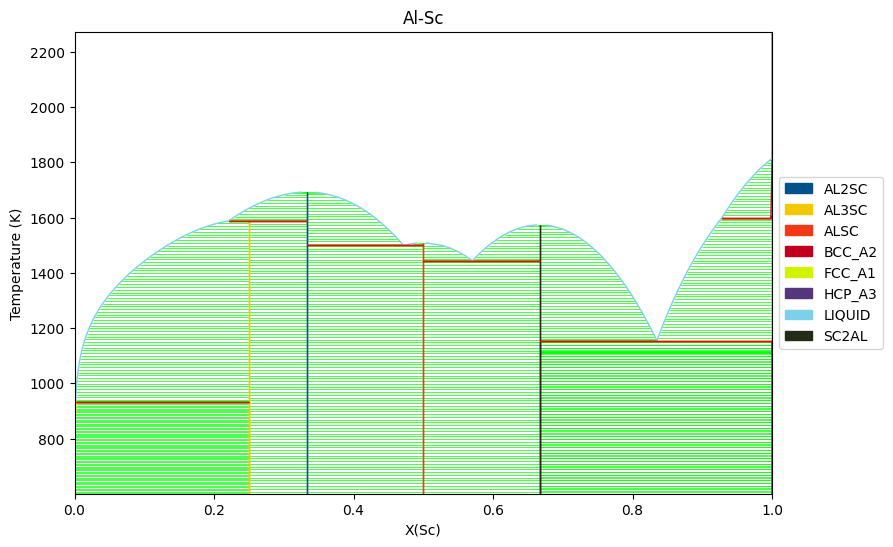

In [474]:
# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# binplot(dbf, ['AL', 'ZR', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})
binplot(dbf, ['AL', 'SC', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})

# Set axis limits AFTER plotting
axes.set_xlim(0, 1)  # Composition range
# axes.set_xlim(0, 0.006)  # Composition range in mol fraction
# axes.set_xlim(0, 0.004)  # Composition range in mol fraction for Zr
# axes.set_xlim(0, 0.006)  # Composition range in mol fraction

axes.set_ylim(600.15, 2273.15)  # Temperature range in Kelvin
# axes.set_ylim(600.15, 1800.15)  # Temperature range in Kelvin

# Update axis labels
axes.set_ylabel('Temperature (K)')
# axes.set_xlabel('Mole Fraction of Ti')

plt.show()